In [41]:
# Simple linear regression intuition
# ordinary least squares : SUM(y-y')^2 = min for each line and select the one with the minimum sum
# y = actual point , y' = point on the line
# hence we need to fine a line with minimum error

# Linear Support Vector regression intuition
# instead of line we will have a box or 3 lines 
# Inside the box we will not considered the points for error
# only the points outside the box are considered for the error calculation
# Some complex equation is used for error calculation

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
data = pd.read_csv('Position_Salaries.csv')

In [61]:
data.head(10)

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
Position    10 non-null object
Level       10 non-null int64
Salary      10 non-null int64
dtypes: int64(2), object(1)
memory usage: 320.0+ bytes


In [46]:
X = data.iloc[:,1:-1].values
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [47]:
Y = data.iloc[:,-1].values
Y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

In [48]:
# Feature scaling
# applying feature scaling on the dependent variable
# as the independent variable level takes value way lower than the dependent variable it will be neglected by the SVr
# hence applying feature scaling for both the independent variable and independent variable


# Hence some tips for feature scaling 
# 1) Dont apply feature scaling for dummy variables formed due to one hot encoding
# 2) When a dependent variable takes a value 0 or 1 we dont have to apply feature scaling
# as the values are already in the right range
# 3) When dependent variable takes super high value wrt to other variables then we need to apply feature scaling to bring them in that proper range
# 4) whenever we  want to split dataset into train and test set , we need to apply feature scaling after the split 

In [49]:
# reshape the Y into 2 dimensional array - because standard scalar class which
# will do feature scaling expects a unique format in its input which is 2d array
Y = Y.reshape(len(Y),1) # 10 rows and 1 column
Y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]], dtype=int64)

In [50]:
# feature scaling 
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X = sc_x.fit_transform(X)
X

C:\Users\saifgazali\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\saifgazali\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [51]:
sc_y = StandardScaler()
Y = sc_y.fit_transform(Y)
Y

C:\Users\saifgazali\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\saifgazali\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

In [52]:
# training the SVR model on the whole dataset
from sklearn.svm import SVR
svr = SVR(kernel='rbf') # Todo : learn about different svm kernels 
svr.fit(X,Y) 

C:\Users\saifgazali\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [53]:
# predicting a new result
# we need to reverse the scaling in order to get the correct value of Y
sc_y.inverse_transform(svr.predict(sc_x.transform([[6.5]])))

array([170370.0204065])

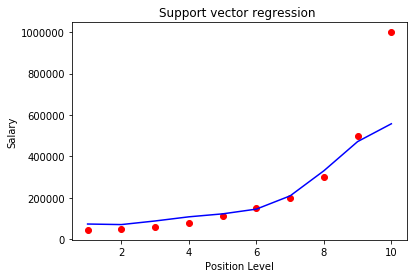

In [65]:
#Visualizing the svr result
plt.scatter(sc_x.inverse_transform(X),sc_y.inverse_transform(Y),color='red')
plt.plot(sc_x.inverse_transform(X),sc_y.inverse_transform(svr.predict(X)),color='blue')
plt.title('Support vector regression ')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()


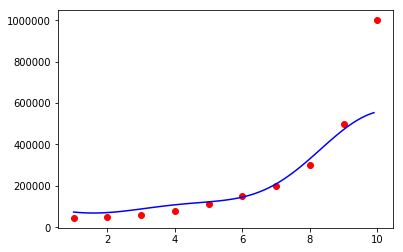

In [81]:
#Visualizing the SVR results(for higher resolution and smoother curve)
X_grid = np.arange(min(sc_x.inverse_transform(X)),max(sc_x.inverse_transform(X)),0.1)
X_grid = X_grid.reshape(len(X_grid),1)
plt.scatter(sc_x.inverse_transform(X),sc_y.inverse_transform(Y),color='red')
plt.plot(X_grid,sc_y.inverse_transform(svr.predict(sc_x.transform(X_grid))),color='blue')

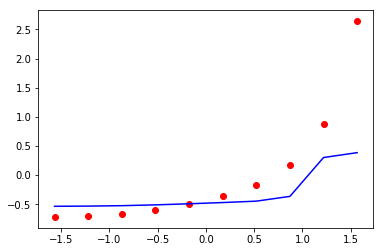

In [32]:
plt.scatter(X,Y,color='red')
plt.plot(X,svr.predict(Y),color='blue')
